Chelsea Watterworth-Analysis 1

Begin by importing libraries

In [1207]:
%matplotlib inline

In [1208]:
from whatif import Model
from whatif import get_sim_results_df

In [1209]:
import copy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from whatif import Model
from whatif import get_sim_results_df

### 1a – Base Model
Create a Python based model to that relates profit to the inputs. It must be an object oriented model. 

In [1210]:
class SingleProductSPF1(Model):
    """Base"""
    def __init__(self, fixed_cost=5000,var_cost=100,selling_cost=115, spf_constant=4900, spf_linear=-35, spf_quadratic=0.06):
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.fixed_cost = fixed_cost
        self.spf_linear = spf_linear
        self.spf_constant = spf_constant
        self.spf_quadratic = spf_quadratic
model_f = SingleProductSPF(var_cost, selling_price, fixed_cost, spf_linear, spf_constant, spf_quadratic)
print(model_f.demand())
print(model_f.profit())


1668.5
20028


### Markdown cells with code of replication-disregard
define a class with given inputs

var_cost = 100
selling_price = 115
fixed_cost = 5000
spf_linear = -35
spf_constant = 4900
spf_quadratic = 0.06

class SingleProductSPF():
    def __init__(self, var_cost, selling_price, fixed_cost, spf_linear, spf_constant, spf_quadratic):
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.fixed_cost = fixed_cost
        self.spf_linear = spf_linear
        self.spf_constant = spf_constant
        self.spf_quadratic = spf_quadratic
#calculate demand        
    def demand(self):
        """Compute demand"""
        return (self.spf_quadratic * (self.selling_price)**2) + self.spf_linear*(self.selling_price) + self.spf_constant
#calculate profit
    def profit(self):
        """Compute profit"""
        return round((self.selling_price * self.demand() -(self.fixed_cost + (self.var_cost* self.demand()))))

 Reset the base inputs
var_cost = 100
selling_price = 115
fixed_cost = 5000
spf_linear = -35
spf_constant = 4900
spf_quadratic = 0.06

 Create a new BookstoreModel object
model_1 = SingleProductSPF(var_cost, selling_price, fixed_cost, spf_linear, spf_constant, spf_quadratic)

#print and test
print(model_1.demand())
print(model_1.profit())

It worked!

#add update and str to class
class SingleProductSPF(Model):
    def __init__(self, var_cost=0, selling_price=0, fixed_cost=0, spf_linear=0, spf_constant=0, spf_quadratic=0):
        self.var_cost = var_cost
        self.selling_price = selling_price
        self.fixed_cost = fixed_cost
        self.spf_linear = spf_linear
        self.spf_constant = spf_constant
        self.spf_quadratic = spf_quadratic
        
    def update(self, param_dict):
        """
        Update parameter values
        """
        for key in param_dict:
            setattr(self, key, param_dict[key])
    
    def demand(self):
        """Compute demand"""
        return (self.spf_quadratic * (self.selling_price)**2) + self.spf_linear*(self.selling_price) + self.spf_constant
    
    def profit(self):
        """Compute profit"""
        return round((self.selling_price * self.demand()) -(self.fixed_cost + (self.var_cost* self.demand())))
    
    def __str__(self):
        """
        Print dictionary of object attributes but don't include an underscore as first char
        """
        return str(vars(self))
        #return str({key: val for (key, val) in vars(self).items() if key[0] != '_'})

### 1b – 1-way Data Table and 1d – 2-way Data Table

In [1211]:
#reset base
base_inputs = {'var_cost': 100,
'selling_price': 115,
'fixed_cost': 5000,
'spf_linear': -35,
'spf_constant': 4900,
'spf_quadratic': 0.06,
}
model_2 = SingleProductSPF()
model_2.update(base_inputs)
print(model_2)

{'var_cost': 100, 'selling_price': 115, 'fixed_cost': 5000, 'spf_linear': -35, 'spf_constant': 4900, 'spf_quadratic': 0.06}


In [1212]:
#set param ranges for 1-way and 2-way on selling price 80-140 in qty of 10, and var_cost 85-110 in qty of 5
dt_param_ranges = {'selling_price': np.arange(80, 150, 10),
                  'var_cost': np.arange(85,120,5)}

In [1213]:
from sklearn.model_selection._search import ParameterGrid

In [1214]:
#create dictionary
dt_param_ranges = {'selling_price': np.arange(80, 150, 10),
                  'var_cost': np.arange(85,120,5)}

In [1215]:
#view parameter grid
dt_param_grid = list(ParameterGrid(dt_param_ranges))
print(dt_param_grid)

[{'selling_price': 80, 'var_cost': 85}, {'selling_price': 80, 'var_cost': 90}, {'selling_price': 80, 'var_cost': 95}, {'selling_price': 80, 'var_cost': 100}, {'selling_price': 80, 'var_cost': 105}, {'selling_price': 80, 'var_cost': 110}, {'selling_price': 80, 'var_cost': 115}, {'selling_price': 90, 'var_cost': 85}, {'selling_price': 90, 'var_cost': 90}, {'selling_price': 90, 'var_cost': 95}, {'selling_price': 90, 'var_cost': 100}, {'selling_price': 90, 'var_cost': 105}, {'selling_price': 90, 'var_cost': 110}, {'selling_price': 90, 'var_cost': 115}, {'selling_price': 100, 'var_cost': 85}, {'selling_price': 100, 'var_cost': 90}, {'selling_price': 100, 'var_cost': 95}, {'selling_price': 100, 'var_cost': 100}, {'selling_price': 100, 'var_cost': 105}, {'selling_price': 100, 'var_cost': 110}, {'selling_price': 100, 'var_cost': 115}, {'selling_price': 110, 'var_cost': 85}, {'selling_price': 110, 'var_cost': 90}, {'selling_price': 110, 'var_cost': 95}, {'selling_price': 110, 'var_cost': 100}, 

In [1216]:
from itertools import product

In [1217]:
# Look at the key, value pairs (tuples) in dt_param_ranges dictionary
dt_param_ranges.items()

dict_items([('selling_price', array([ 80,  90, 100, 110, 120, 130, 140])), ('var_cost', array([ 85,  90,  95, 100, 105, 110, 115]))])

In [1218]:
#Now we can use unpacking along with the zip function to get two tuples. One tuple will get stored in the variable keys and the other in values.
print("The original tuples")
print(*dt_param_ranges.items())
print("\nThe zipped tuples")
keys, values = zip(*dt_param_ranges.items())
print(keys, values)

The original tuples
('selling_price', array([ 80,  90, 100, 110, 120, 130, 140])) ('var_cost', array([ 85,  90,  95, 100, 105, 110, 115]))

The zipped tuples
('selling_price', 'var_cost') (array([ 80,  90, 100, 110, 120, 130, 140]), array([ 85,  90,  95, 100, 105, 110, 115]))


In [1219]:
print(values)

(array([ 80,  90, 100, 110, 120, 130, 140]), array([ 85,  90,  95, 100, 105, 110, 115]))


In [1220]:
print(list(product(*values)))

[(80, 85), (80, 90), (80, 95), (80, 100), (80, 105), (80, 110), (80, 115), (90, 85), (90, 90), (90, 95), (90, 100), (90, 105), (90, 110), (90, 115), (100, 85), (100, 90), (100, 95), (100, 100), (100, 105), (100, 110), (100, 115), (110, 85), (110, 90), (110, 95), (110, 100), (110, 105), (110, 110), (110, 115), (120, 85), (120, 90), (120, 95), (120, 100), (120, 105), (120, 110), (120, 115), (130, 85), (130, 90), (130, 95), (130, 100), (130, 105), (130, 110), (130, 115), (140, 85), (140, 90), (140, 95), (140, 100), (140, 105), (140, 110), (140, 115)]


In [1221]:
keys

('selling_price', 'var_cost')

In [1222]:
#zip and turn into dictionary
param_grid = []

keys, values = zip(*dt_param_ranges.items())

for scenario in product(*values):
    params = dict(zip(keys, scenario))
    param_grid.append(params)
        
print(param_grid)

[{'selling_price': 80, 'var_cost': 85}, {'selling_price': 80, 'var_cost': 90}, {'selling_price': 80, 'var_cost': 95}, {'selling_price': 80, 'var_cost': 100}, {'selling_price': 80, 'var_cost': 105}, {'selling_price': 80, 'var_cost': 110}, {'selling_price': 80, 'var_cost': 115}, {'selling_price': 90, 'var_cost': 85}, {'selling_price': 90, 'var_cost': 90}, {'selling_price': 90, 'var_cost': 95}, {'selling_price': 90, 'var_cost': 100}, {'selling_price': 90, 'var_cost': 105}, {'selling_price': 90, 'var_cost': 110}, {'selling_price': 90, 'var_cost': 115}, {'selling_price': 100, 'var_cost': 85}, {'selling_price': 100, 'var_cost': 90}, {'selling_price': 100, 'var_cost': 95}, {'selling_price': 100, 'var_cost': 100}, {'selling_price': 100, 'var_cost': 105}, {'selling_price': 100, 'var_cost': 110}, {'selling_price': 100, 'var_cost': 115}, {'selling_price': 110, 'var_cost': 85}, {'selling_price': 110, 'var_cost': 90}, {'selling_price': 110, 'var_cost': 95}, {'selling_price': 110, 'var_cost': 100}, 

In [1223]:
#indirect method calling with getattr
getattr(model_2, 'profit')()

20028

In [1224]:
#new dictionary
base_inputs = {'var_cost': 100,
'selling_price': 115,
'fixed_cost': 5000,
'spf_linear': -35,
'spf_constant': 4900,
'spf_quadratic': 0.06,
}

In [1225]:
# Create a new model with inputs specified by base_inputs dict
model_6 = SingleProductSPF(**base_inputs)
print(model_6)
model_6.profit()


{'var_cost': 100, 'selling_price': 115, 'fixed_cost': 5000, 'spf_linear': -35, 'spf_constant': 4900, 'spf_quadratic': 0.06}


20028

In [1226]:
# Specify input ranges for scenarios (dictionary)
# 1-way table
dt_param_ranges_1 = {'selling_price': np.arange(80, 150, 10)}


# 2-way table
dt_param_ranges_2 = {'selling_price': np.arange(80, 150, 10),
                     'var_cost': np.arange(85, 120, 5)}

# Specify desired outputs (list)
outputs = ['demand', 'profit']



In [1227]:
# Use data_table function to create 1-way data table
m6_dt1_df = data_table(model_6, dt_param_ranges_1, outputs)
m6_dt1_df


,selling_price,demand,profit
0,80,2484.0,-54680
1,90,2236.0,-27360
2,100,2000.0,-5000
3,110,1776.0,12760
4,120,1564.0,26280
5,130,1364.0,35920
6,140,1176.0,42040


In [1228]:
# Use data_table function to create 2-way data table
m6_dt2_df = data_table(model_6, dt_param_ranges_2, outputs)
m6_dt2_df

,selling_price,var_cost,demand,profit
0,80,85,2484.0,-17420
1,80,90,2484.0,-29840
2,80,95,2484.0,-42260
3,80,100,2484.0,-54680
4,80,105,2484.0,-67100
5,80,110,2484.0,-79520
6,80,115,2484.0,-91940
7,90,85,2236.0,6180
8,90,90,2236.0,-5000
9,90,95,2236.0,-16180


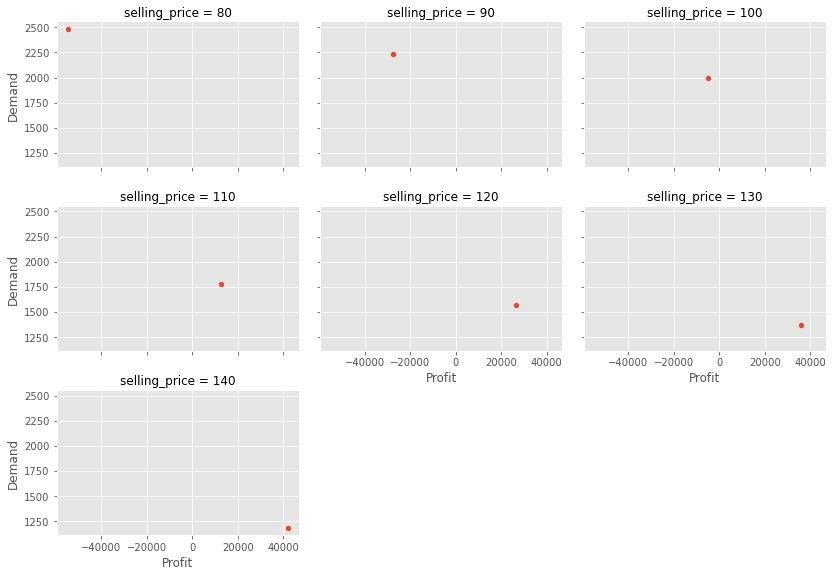

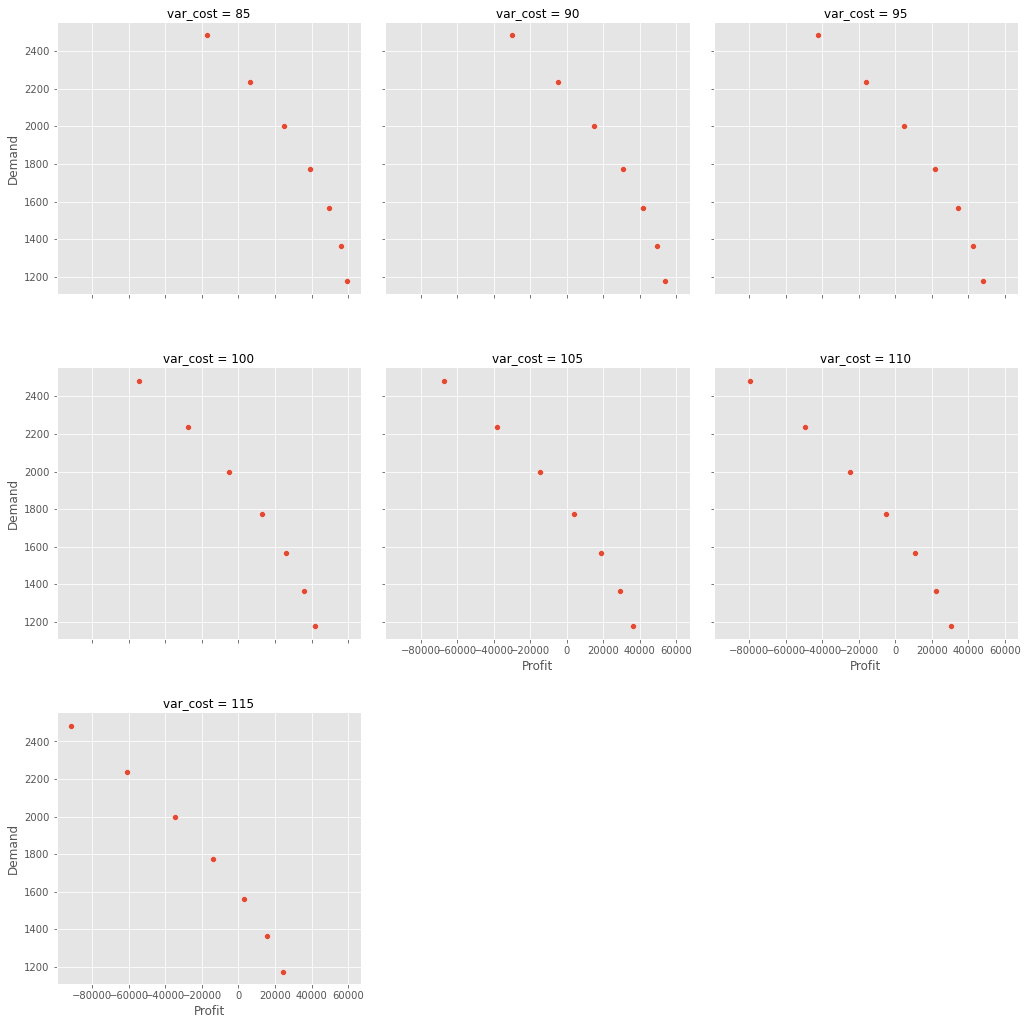

In [1229]:
#plot 1-way results using seaborn
g = sns.FacetGrid(m6_dt1_df, col="selling_price", col_wrap=3)
g.map(sns.scatterplot, "profit", "demand")
g.fig.set_size_inches(12, 8)
g.set_axis_labels("Profit", "Demand")
plt.show()

#plot 2-way results using seaborn
g = sns.FacetGrid(m6_dt2_df, col="var_cost", col_wrap=3)
g.map(sns.scatterplot, "profit", "demand")
g.fig.set_size_inches(15, 15)
g.set_axis_labels("Profit", "Demand")
plt.show()

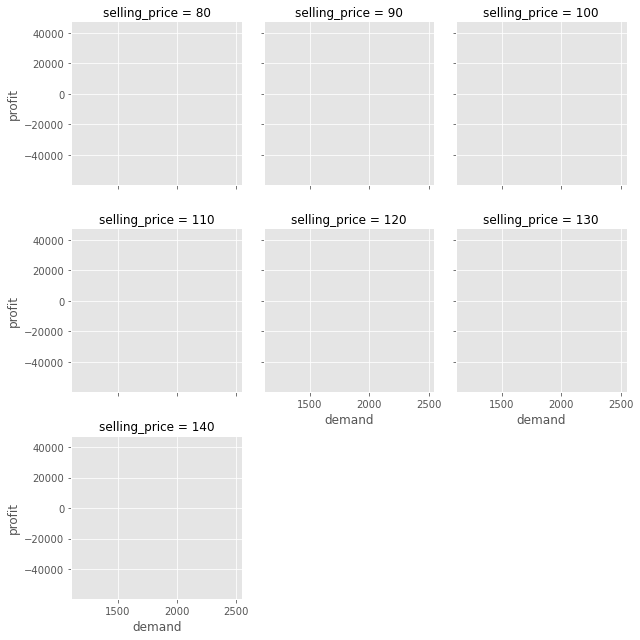

In [1230]:
#from notes
profit_dt_g = sns.FacetGrid(m6_dt1_df, col="selling_price", sharey=True, col_wrap=3)
profit_dt_g = profit_dt_g.map(plt.plot, "demand", "profit")


For some reason, my 1-way data table would not populate line graphs using the code presneted in the notes. I tried a different way.
It appears that the 1-way table between selling price and profit is linear, as selling price increases the demand and profit go down.
This is also echoed by the two way table


### 1c – Goal Seek Break Even

In [1231]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection._search import ParameterGrid
import seaborn as sns
import copy

In [1232]:
#using goal_Seek from whatif.py
goal_seek(model_6, 'profit', 0, 'selling_price', 80, 140, N=100, verbose=True)

n = 1, a_n = 80, b_n = 140, m_n = 110.0, width = 60
Root is in left half
n = 2, a_n = 80, b_n = 110.0, m_n = 95.0, width = 30.0
Root is in right half
n = 3, a_n = 95.0, b_n = 110.0, m_n = 102.5, width = 15.0
Root is in right half
n = 4, a_n = 102.5, b_n = 110.0, m_n = 106.25, width = 7.5
Root is in left half
n = 5, a_n = 102.5, b_n = 106.25, m_n = 104.375, width = 3.75
Root is in left half
n = 6, a_n = 102.5, b_n = 104.375, m_n = 103.4375, width = 1.875
Root is in left half
n = 7, a_n = 102.5, b_n = 103.4375, m_n = 102.96875, width = 0.9375
Root is in left half
n = 8, a_n = 102.5, b_n = 102.96875, m_n = 102.734375, width = 0.46875
Root is in left half
n = 9, a_n = 102.5, b_n = 102.734375, m_n = 102.6171875, width = 0.234375
Root is in left half
n = 10, a_n = 102.5, b_n = 102.6171875, m_n = 102.55859375, width = 0.1171875
Root is in right half
n = 11, a_n = 102.55859375, b_n = 102.6171875, m_n = 102.587890625, width = 0.05859375
Root is in left half
n = 12, a_n = 102.55859375, b_n = 102

102.57598876953125

Break even selling price is ~$102 

### 1e – Digging deeper

In [1233]:
#using goal seek and expanded range
goal_seek(model_6, 'profit', 0, 'selling_price', 80, 250, N=200, verbose=True)

In [1234]:
dt_param_ranges_1_2 = {'selling_price': np.arange(80, 260, 10)}

outputs = ['demand', 'profit']

m6_dt1_df_2 = data_table(model_6, dt_param_ranges_1_2, outputs)
m6_dt1_df_2



,selling_price,demand,profit
0,80,2484.0,-54680
1,90,2236.0,-27360
2,100,2000.0,-5000
3,110,1776.0,12760
4,120,1564.0,26280
5,130,1364.0,35920
6,140,1176.0,42040
7,150,1000.0,45000
8,160,836.0,45160
9,170,684.0,42880


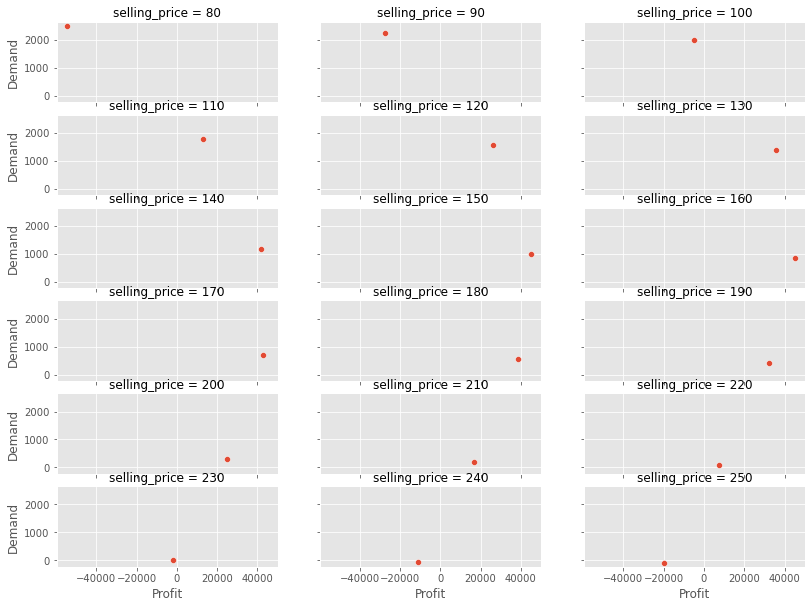

In [1235]:
g = sns.FacetGrid(m6_dt1_df_2, col="selling_price", col_wrap=3)
g.map(sns.scatterplot, "profit", "demand")
g.fig.set_size_inches(12, 8)
g.set_axis_labels("Profit", "Demand")
plt.show()

When the range is expanded to selling price 80-250, we see that the lower and upper extremes produce negative profit. Only between selling prices of 110-220 are profits possible

### 1f- Simulation

In [1236]:
from numpy.random import default_rng
rg = default_rng(4470)

num_reps = 100
model2 = SingleProductSPF(var_cost=var_cost, 
                        selling_price=selling_price,
                        fixed_cost=fixed_cost,
                        spf_linear=spf_linear,
                        spf_quadratic=spf_quadratic,
                        spf_constant=spf_constant)

random_inputs = {'var_cost': rg.uniform(80, 120, num_reps)}

In [1237]:
scenario_inputs = {'var_cost': np.arange(80, 130, 10)}
list(ParameterGrid(scenario_inputs))

[{'var_cost': 80},
 {'var_cost': 90},
 {'var_cost': 100},
 {'var_cost': 110},
 {'var_cost': 120}]

In [1238]:
sim_outputs = ['profit']

In [1239]:
model2_results = simulate(model2, random_inputs, sim_outputs, scenario_inputs)

In [1240]:
def get_sim_results_df(results):
    
    dfs = []    
    for r in results:
        df = pd.DataFrame(r['output'])
        df['scenario_num'] = r['scenario_num']
        for key, val in r['scenario_vals'].items():
            df[key] = val
            
        dfs.append(df)

    results_df = pd.concat(dfs)
    
    return results_df

In [1241]:
which_scenario = 4

# What are the keys in the output dictionaries
model2_results[which_scenario].keys()

dict_keys(['scenario_base_vals', 'scenario_num', 'scenario_vals', 'output'])

In [1242]:
model2_results[which_scenario]['scenario_vals']

{'var_cost': 120}

In [1243]:
for scenario in model2_results:
    print(scenario['scenario_num'], scenario['scenario_vals'], scenario['output']['profit'])

0 {'var_cost': 80} 53398
1 {'var_cost': 90} 36712
2 {'var_cost': 100} 20028
3 {'var_cost': 110} 3342
4 {'var_cost': 120} -13342


In [1244]:
model2_results[4]

{'scenario_base_vals': {'var_cost': 100,
  'selling_price': 115,
  'fixed_cost': 5000,
  'spf_linear': -35,
  'spf_constant': 4900,
  'spf_quadratic': 0.06},
 'scenario_num': 4,
 'scenario_vals': {'var_cost': 120},
 'output': {'profit': -13342}}

In [1245]:
def get_sim_results_df(results):
    
    dfs = []    
    for r in results:
        df = pd.DataFrame(r['output'])
        df['scenario_num'] = r['scenario_num']
        for key, val in r['scenario_vals'].items():
            df[key] = val
            
        dfs.append(df)

    results_df = pd.concat(dfs)
    
    return results_df

In [1246]:
model2_results_df = get_sim_results_df(model2_results)

ValueError: If using all scalar values, you must pass an index

Although I was unable to create the dataframe to plot the results, based on our simulation it is a low probability that the profit will be negative between variable cost of 80-120